<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/dl-handson-tcb/blob/master/T01_IntroDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Deep Neural Networks (DNN) para clasificación multi-clase*

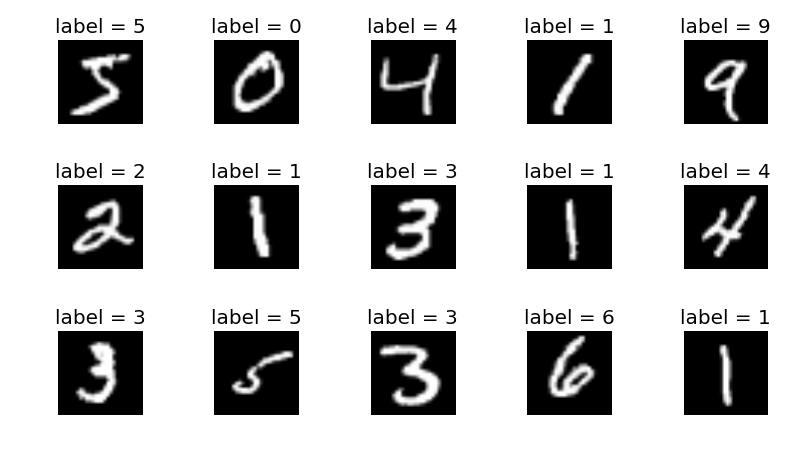

## 0. Preparación del entorno y comprobación de requisitos

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
SUBFOLDER = "T01_IntroDNN"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", SUBFOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Información de versiones

In [2]:
tf.__version__

'2.4.2'

In [3]:
keras.__version__

'2.4.0'

### Comprobar si disponemos de una GPU

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. Inspeccionar los datos y crear subconjuntos train, test, validation

In [5]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(np.unique(y_train_full))

[0 1 2 3 4 5 6 7 8 9]


In [15]:
y_train_full[0]

5

### Crear subconjunto de datos para validación

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,train_size=55000,shuffle=False)
print(X_train.shape)
print(X_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


### Normalizar las entradas

In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
# SOLUTION
X_train = X_train/255.
X_valid = X_valid/255.
X_test  = X_test/255.

### Examinar los datos

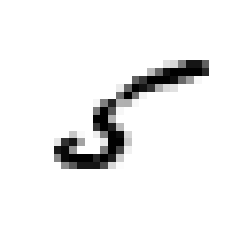

Clase:  5


In [12]:
N = 11
import matplotlib.pyplot as plt
plt.imshow(X_train[N], cmap="binary")
plt.axis('off')
plt.show()
print("Clase: ", y_train[N])

Saving figure mnist_plot


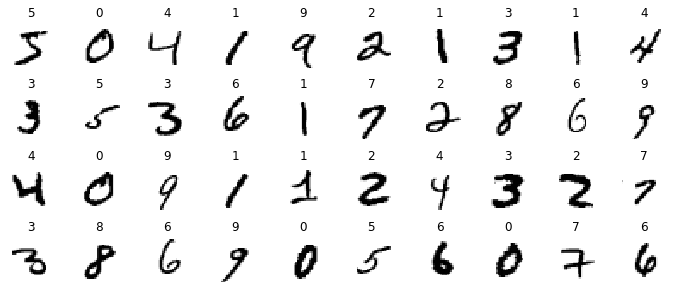

In [101]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('mnist_plot', tight_layout=False)
plt.show()

## 2. Definir una red neuronal

#### Con una capa oculta (swallow network)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(784, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


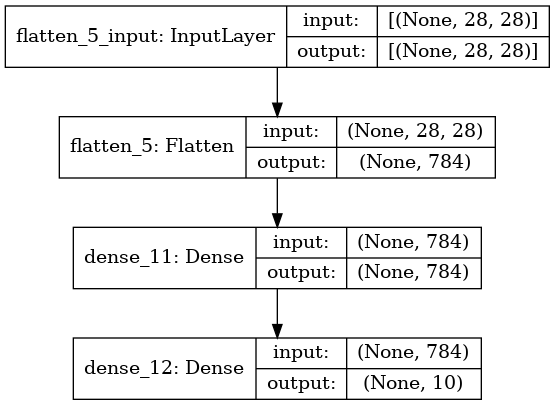

In [109]:
keras.utils.plot_model(model, show_shapes=True)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## 3. Entrenar red neuronal

In [16]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 3s 1ms/step - loss: 1.7399 - accuracy: 0.5414 - val_loss: 0.7123 - val_accuracy: 0.8754
Epoch 2/15
1719/1719 [==============================] - 2s 912us/step - loss: 0.7135 - accuracy: 0.8391 - val_loss: 0.4592 - val_accuracy: 0.9004
Epoch 3/15
1719/1719 [==============================] - 2s 916us/step - loss: 0.5174 - accuracy: 0.8694 - val_loss: 0.3748 - val_accuracy: 0.9102
Epoch 4/15
1719/1719 [==============================] - 2s 938us/step - loss: 0.4483 - accuracy: 0.8794 - val_loss: 0.3334 - val_accuracy: 0.9138
Epoch 5/15
1719/1719 [==============================] - 2s 919us/step - loss: 0.4130 - accuracy: 0.8857 - val_loss: 0.3146 - val_accuracy: 0.9150
Epoch 6/15
1719/1719 [==============================] - 2s 896us/step - loss: 0.3826 - accuracy: 0.8930 - val_loss: 0.2963 - val_accuracy: 0.9202
Epoch 7/15
1719/1719 [==============================] - 2s 915us/step - loss: 0.3655 - accuracy: 0.8955 - val_loss: 0.2849 - v

#### Visualizando gráficamente la evolución del entrenamiento

Saving figure keras_learning_curves_plot


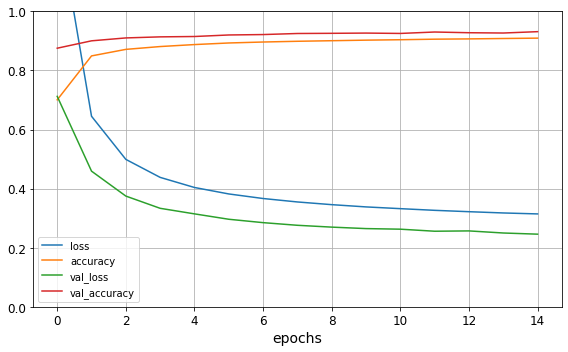

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("epochs")
save_fig("keras_learning_curves_plot")
plt.show()

## 3. Test

#### Midiendo el rendimiento con el set de test

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 776us/step - loss: 0.2945 - accuracy: 0.9156


[0.2944893538951874, 0.9156000018119812]

#### Vamos a ver si la red acierta con algunos ejemplos del set de test

In [20]:
N = 50
X_new = X_test[N:N+10]
y_new = y_test[N:N+10]
print(y_new)

[6 3 5 5 6 0 4 1 9 5]


In [22]:
y_pred = model.predict(X_new)
print(y_pred.round(2))
print(np.argmax(y_pred,axis=-1))

[[0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.   0.   0.05 0.87 0.01 0.   0.01 0.01]
 [0.01 0.   0.   0.03 0.01 0.92 0.   0.   0.02 0.  ]
 [0.   0.   0.08 0.   0.   0.   0.91 0.   0.01 0.  ]
 [0.95 0.   0.   0.   0.   0.03 0.   0.   0.02 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.96 0.01 0.01 0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.03 0.   0.   0.05 0.   0.91]
 [0.05 0.   0.   0.   0.01 0.81 0.   0.12 0.01 0.  ]]
[6 3 5 5 6 0 4 1 9 5]


## 4. Bonus: examinando los valores de los parámetros de la red entrenada

In [42]:
model.layers

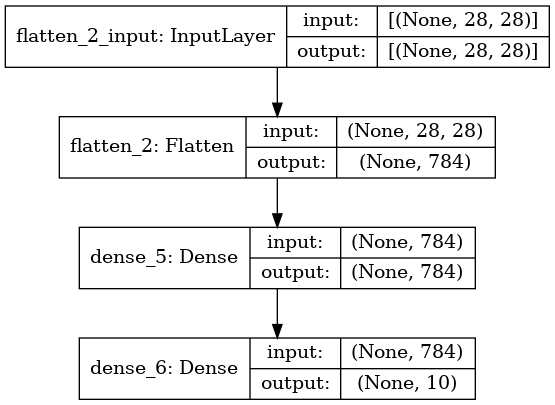

In [43]:
keras.utils.plot_model(model, "mi_primera_dnn.png", show_shapes=True)

In [55]:
for layer in model.layers:
    print(layer.name)

flatten_2
dense_5
dense_6


#### Capa de salida

In [72]:
output = model.layers[2]
weights, biases = output.get_weights()
print(weights.shape)
print(biases.shape)

(784, 10)
(10,)


#### Capa oculta

In [74]:
hidden = model.layers[1]

In [77]:
weights, biases = hidden.get_weights()
print(weights.shape)
print(biases.shape)

(784, 784)
(784,)


In [80]:
weights

array([[-0.02339514,  0.03202295, -0.00217078, ...,  0.04742808,
        -0.00577438, -0.03832768],
       [ 0.0189862 , -0.02382605,  0.0008084 , ..., -0.00995547,
        -0.04440974,  0.04423527],
       [-0.0414763 ,  0.05359873,  0.04095175, ...,  0.01283141,
         0.00340666,  0.00663725],
       ...,
       [-0.03392144, -0.02238785,  0.05330373, ...,  0.05026633,
        -0.028621  , -0.00935446],
       [-0.05206453, -0.03822432, -0.03387459, ...,  0.05114689,
        -0.05986575, -0.02483224],
       [-0.02168729, -0.02559924, -0.03484146, ...,  0.05584392,
        -0.05988756,  0.03162229]], dtype=float32)

In [81]:
biases

array([ 5.80153009e-03, -1.12379165e-02, -2.03621923e-03, -1.64948485e-03,
        2.58600885e-05, -3.82976606e-03, -5.90380514e-03, -3.43640707e-03,
       -7.68917892e-03, -3.73227638e-03, -8.83260556e-03, -4.43378370e-03,
       -1.34104248e-02,  9.29672550e-03, -3.19481740e-04, -4.23880247e-03,
       -8.91273376e-04,  9.76853655e-04,  1.43509393e-03, -1.43376486e-02,
       -3.16813332e-03,  1.79888855e-04,  8.82375240e-03,  3.53153516e-03,
        4.25646175e-03,  3.46129062e-04, -2.14640587e-03, -4.04257281e-03,
       -1.28068659e-03,  1.15952855e-02,  1.54600921e-03,  8.57400987e-03,
       -1.04043481e-03,  7.61518162e-03,  3.20089329e-03, -1.06593585e-02,
        9.46687534e-03,  8.82649049e-03, -1.39585454e-02, -4.35474887e-03,
        1.54182804e-03, -2.04629470e-02,  4.33757436e-03, -2.79946579e-03,
       -7.32204862e-05, -1.36695127e-03,  4.17668652e-03, -2.01753667e-03,
       -1.07094049e-02,  3.17523198e-04,  4.45765257e-03,  4.86725103e-03,
       -2.90765823e-03, -